In [169]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import colors
import threading, queue
import scipy.io


from Tree import Node


In [170]:
#split s means we check all y-values to see if they're above or below the line
# %%
#split s means we check all y-values to see if they're above or below the line
'''
split cost functions
Desc: finds cost of a split
parameters: 
s: split value
c1: mean color left/below split [r,g,b]
c2: mean color right/above split [r,g,b]
'''

def hor_split_cost(s, y_values, vals):
    #get values left
    #(V[np.nonzero(Y[Y>3])])
    #print(np.nonzero(y_values[y_values <= s]))
    left_values = vals[np.where(y_values <= s)]
    right_values = vals[np.where(y_values > s)]
    c1 = np.mean(left_values, axis = 0)
    c2 = np.mean(right_values, axis = 0)
    print("left, right values: ", np.where(y_values > s))
    #print(np.shape(left_values), np.shape(right_values))
    #print(c1)
    left_values -= np.tile(c1, (len(left_values), 1))
    #print(left_values)
    left_cost = np.sum(np.square(np.linalg.norm(left_values, axis=1)))
        
    right_values -= np.tile(c2, (len(right_values), 1))
    right_cost = np.sum(np.square(np.linalg.norm(right_values, axis=1)))
    cost = right_cost + left_cost
    return cost, c1, c2

def vert_split_cost(s, x_values, vals):
    #get values left 
    #print(f"Xvalue: {x_values}")
    left_values = vals[np.where(x_values <= s)]
    right_values = vals[np.where(x_values > s)]
    print("left, right values: ", left_values, right_values)
    c1 = np.mean(left_values, axis = 0)
    c2 = np.mean(right_values, axis = 0)
    #print(len(left_values))
    #print(c1)
    left_values -= np.tile(c1, (len(left_values), 1))
    left_cost = np.sum(np.square(np.linalg.norm(left_values, axis=1)))
        
    right_values -= np.tile(c2, (len(right_values), 1))
    right_cost = np.sum(np.square(np.linalg.norm(right_values, axis=1)))

    #print(left_values)
    cost = left_cost + right_cost
    return cost, c1, c2

In [171]:
'''
Returns direction & optimal split value
'''
def OptimalSplitRegression(x_data,y_data,vals):
    #print(x_data,y_data,vals)
    #pre-sort X & Y values:
    #print("xdata", x_data)
    x_sorted = np.sort(x_data)
    y_sorted = np.sort(y_data)
    if(len(x_sorted) == 0 and len(y_sorted) == 0):
        return False
    #print(x_sorted)

    #get split values by summing array with shifted array by 1 to right and taking mean of every entry
    x_splits = 0.5 * (x_sorted[:-1]+np.roll(x_sorted,-1)[:-1])
    y_splits = 0.5 * (y_sorted[:-1]+np.roll(y_sorted,-1)[:-1])
    #print(x_splits, y_splits)
     
    min_cost = float('inf')
    min_c1: np.array
    min_c2: np.array
    min_direction = False
    min_s = 0

    #find min cost split among both x and y splits
    for x_split in x_splits:
        cost, c1, c2 = vert_split_cost(x_split,x_data, vals)
        print(f'x_split: {x_split}; cost: {cost}')
        if(cost < min_cost):
            min_s = x_split
            min_cost = cost
            min_c1 = c1
            min_c2 = c2
            min_direction = True
    for y_split in y_splits:
        cost, c1, c2 = hor_split_cost(y_split, y_data, vals)
        print(f'y_split: {y_split}; cost: {cost}')
        if(cost <= min_cost):
            min_s = y_split
            min_cost = cost
            min_c1 = c1
            min_c2 = c2
            min_direction = False
    return min_s, min_cost, min_c1, min_c2, min_direction

In [172]:
def write_to_image(img, dir, x_min, x_max, y_min, y_max, s, c1, c2, x_dim, y_dim):
    #print(dir, x_min, x_max, y_min, y_max, s, c1, c2, x_dim, y_dim)
    if(dir):
        #horizontal cut

        #scale it to the integers
        split = s*x_dim
        img[x_min:x_max, y_min:int(split)] = c1
        img[x_min:x_max, int(split):y_max] = c2
    else:
        #vertical cut

        #scale it to the integers
        split  = s* y_dim
        img[x_min:int(split), y_min:y_max] = c1
        img[int(split):x_max, y_min:y_max] = c2

    return img

In [173]:
'''
#Code for Regression Tree:
MAX_ITTER = 2
x_dim = 100
y_dim = 100

Y = np.array([0.25, 0.1, 0.8])
X = np.array([0.25,0.8,0.6])
V = np.array([[0.1,0.5,0.2],[0.4,0.1,0.3],[0.9,0.2,0.0]])
n = 3

vals = V
y_values = Y
s = 0.5
left_values = vals[np.nonzero(y_values <= s)]
right_values = vals[np.nonzero(y_values > s)]

print(np.nonzero(y_values > s))
'''

'\n#Code for Regression Tree:\nMAX_ITTER = 2\nx_dim = 100\ny_dim = 100\n\nY = np.array([0.25, 0.1, 0.8])\nX = np.array([0.25,0.8,0.6])\nV = np.array([[0.1,0.5,0.2],[0.4,0.1,0.3],[0.9,0.2,0.0]])\nn = 3\n\nvals = V\ny_values = Y\ns = 0.5\nleft_values = vals[np.nonzero(y_values <= s)]\nright_values = vals[np.nonzero(y_values > s)]\n\nprint(np.nonzero(y_values > s))\n'

left, right values:  [[0.1 0.5 0.2]] [[0.4 0.1 0.3]
 [0.9 0.2 0. ]]
x_split: 0.425; cost: 0.175
left, right values:  [[0.1 0.5 0.2]
 [0.9 0.2 0. ]] [[0.4 0.1 0.3]]
x_split: 0.7; cost: 0.38500000000000006
left, right values:  (array([0, 2], dtype=int64),)
y_split: 0.175; cost: 0.38500000000000006
left, right values:  (array([2], dtype=int64),)
y_split: 0.525; cost: 0.13
s: 0.525, c1: [0.25 0.3  0.25], c2: [0.9 0.2 0. ]
len lengths:  (array([0, 1], dtype=int64),) (array([2], dtype=int64),) 1


'\nwe need top get the indices of the values and then \n'

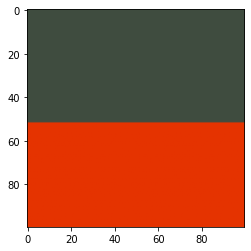

In [174]:
#Code for Regression Tree:
MAX_ITTER = 2
x_dim = 100
y_dim = 100

Y = np.array([0.25, 0.1, 0.8])
X = np.array([0.25,0.8,0.6])
V = np.array([[0.1,0.5,0.2],[0.4,0.1,0.3],[0.9,0.2,0.0]])
n = 4

#stores leaves to consider
q = queue.Queue()
# X_points, Y_points, x_min, x_max, y_min, y_max, color
init_node = Node(X, Y, V, 0, x_dim, 0, y_dim)

q.put(init_node)
itter = 0
img = np.zeros((x_dim, y_dim, 3))

#q.qsize() function is inaccurate, so we use our own count
queue_count = 1
while itter < MAX_ITTER and queue_count > 0:
    itter += 1
    curr_node = q.get()
    queue_count -= 1
    s, cost, c1, c2, direction = OptimalSplitRegression(curr_node.x_elements,curr_node.y_elements,curr_node.vals)
    #print(curr_node.x_elements, curr_node.y_elements)
    #write to our image with the current split
    print(f"s: {s}, c1: {c1}, c2: {c2}")
    write_to_image(img, direction, curr_node.x_min, curr_node.x_max, curr_node.y_min, curr_node.y_max, s, c1, c2, x_dim, y_dim)
    if(not direction):
        #horizontal cut:
        y_left = curr_node.y_elements[curr_node.y_elements <= s]
        y_right = curr_node.y_elements[curr_node.y_elements > s]

        lefts = np.where(curr_node.y_elements <= s)
        rights = np.where(curr_node.y_elements > s)

        left_values = curr_node.vals[lefts]
        right_values = curr_node.vals[rights]

        #create children node we push to the queue: 
        left_node = Node(curr_node.x_elements[lefts], y_left, left_values, curr_node.x_min, curr_node.x_max, curr_node.y_min, int(s*y_dim))
        right_node = Node(curr_node.x_elements[rights], y_right, right_values, curr_node.x_min, curr_node.x_max, int(s*y_dim), curr_node.y_max)
        print("len lengths: ", lefts, rights, np.size(rights))

        #enqueue mixed leaves:
        if(len(lefts) > 1 and cost > 0):
            q.put(left_node)
            queue_count += 1
        if(len(rights) > 1 and cost > 0):
            q.put(right_node)
            queue_count += 1
    else:
        #vertical cut:
        x_left = curr_node.x_elements[curr_node.x_elements <= s]
        x_right = curr_node.x_elements[curr_node.x_elements > s]
        lefts = np.where(curr_node.x_elements <= s)
        rights = np.where(curr_node.x_elements > s)
        left_values = curr_node.vals[lefts]
        right_values = curr_node.vals[rights]
        
        #create children node we push to the queue:
        left_node = Node(x_left, curr_node.y_elements[lefts], left_values, curr_node.x_min, int(s*x_dim), curr_node.y_min, curr_node.y_max)
        right_node = Node(x_right, curr_node.y_elements[rights], right_values, int(s*x_dim), curr_node.x_max, curr_node.y_min, curr_node.y_max)
        print("len lengths: ", lefts, rights, np.size(rights))

        if(np.size(lefts) > 1 and cost > 0):
            q.put(left_node)
            queue_count += 1
        if(np.size(rights) > 1 and cost > 0):
            q.put(right_node)
            queue_count +=1
#print(itter, queue_count)
plt.imshow(img)
'''
we need top get the indices of the values and then 
'''